<a href="https://www.kaggle.com/code/faressayah/predict-the-churn-of-your-valuable-customers?scriptVersionId=117767836" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Churn in Telecom Companies
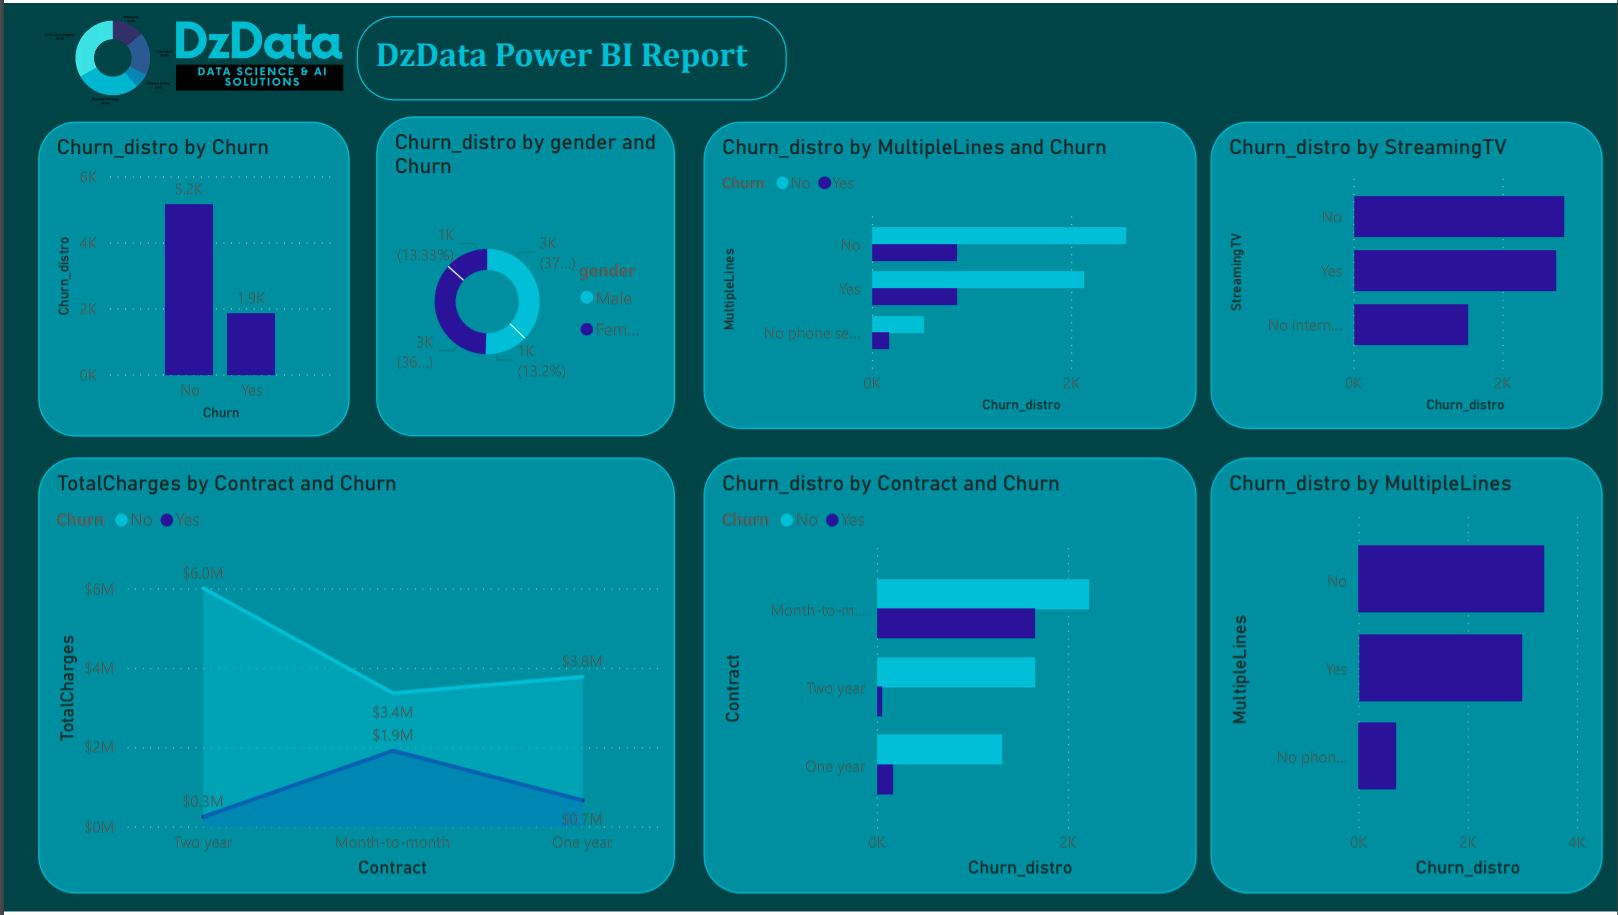

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float', '{:.4f}'.format)

In [2]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


# 1. Exploratory Data Analysis (EDA)

In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0000,7043.0000,7043.0000
mean,0.1621,32.3711,64.7617
std,0.3686,24.5595,30.0900
min,0.0000,0.0000,18.2500
25%,0.0000,9.0000,35.5000
50%,0.0000,29.0000,70.3500
75%,0.0000,55.0000,89.8500
max,1.0000,72.0000,118.7500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## `customerID`

In [5]:
data.customerID.nunique()

7043

The `customerID` is unique for each customers and will not be useful to our model.

## `Churn`: Target variable

In [6]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

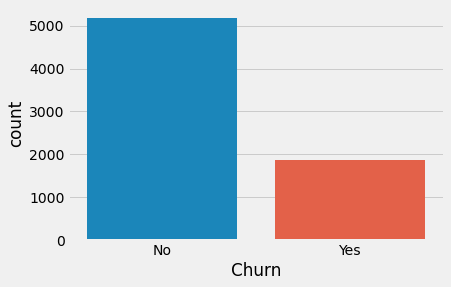

In [7]:
sns.countplot(x='Churn', data=data)

## `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`
- `gender`: Whether the customer is a male or a female
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0)
- `Partner`: Whether the customer has a partner or not (Yes, No)
- `Dependents`: Whether the customer has dependents or not (Yes, No)
- `PhoneService`: Whether the customer has a ohone service or not (Yes, No)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

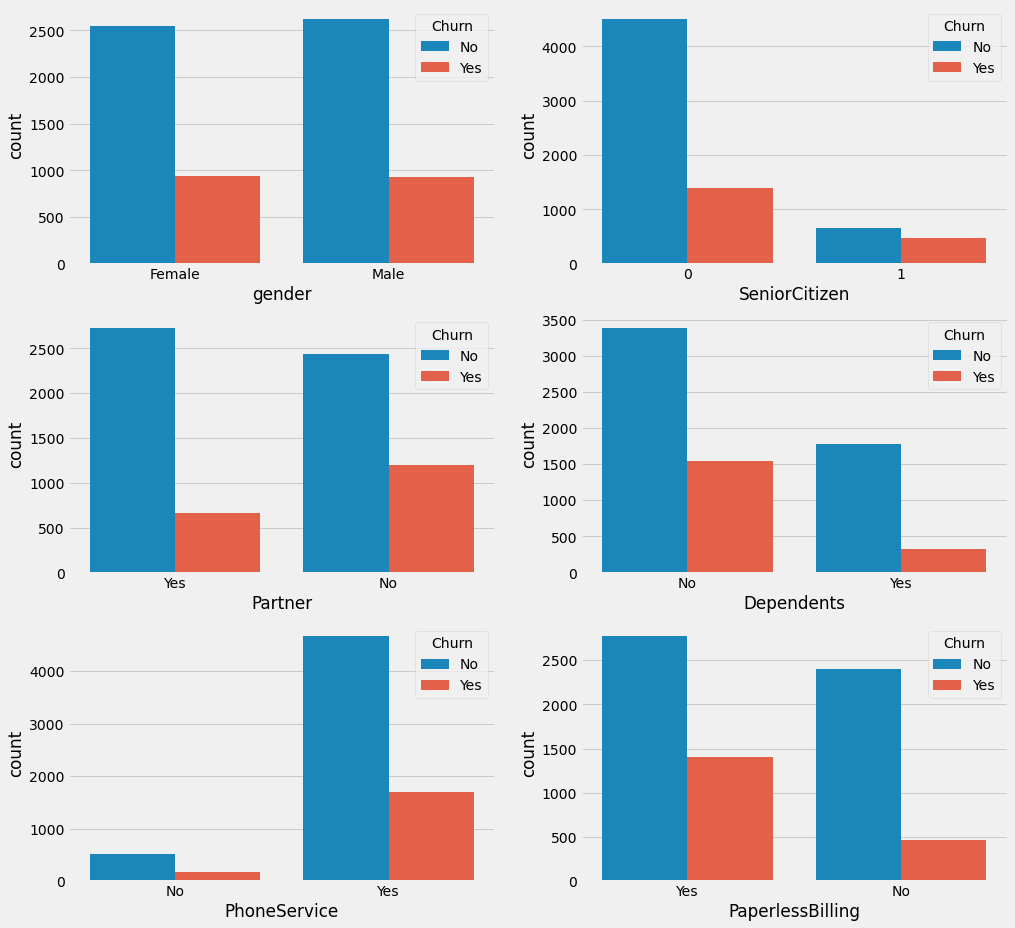

In [8]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot(x='gender', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot(x='SeniorCitizen', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot(x='Partner', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot(x='Dependents', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot(x='PhoneService', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot(x='PaperlessBilling', data=data, hue='Churn')

It seems that the gender column doesn't have a big effect on the Chur rate. 
- Churn: 50.73% Males, 49.26% Females
- Not Churn: 50.24% Males, 49.75% Females

The senior citizen are more likely to churn

## `tenure`, `MonthlyCharges`, `TotalCharges`
- `tenure`: The number of months the customer has stayed with the company
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer

In [9]:
data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [10]:
data.tenure.max()

72

In [11]:
data['TotalCharges'] = data.TotalCharges.replace(' ', np.nan)
data['TotalCharges'] = data.TotalCharges.astype(float)

In [12]:
data.TotalCharges.dtype

dtype('float64')

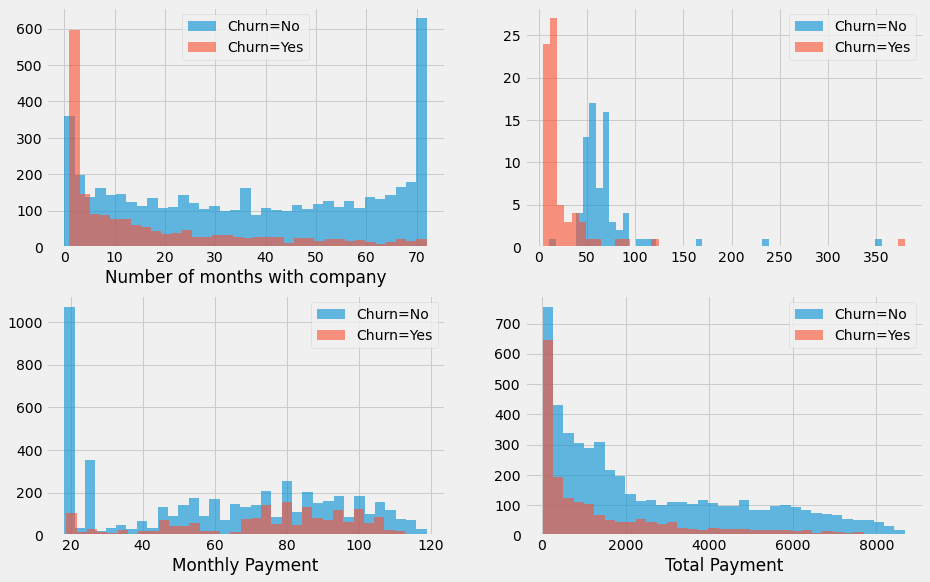

In [13]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
data[data.Churn == 'No'].tenure.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of months with company')

plt.subplot(3, 2, 2)
data[data.Churn == 'No'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=Yes')
plt.legend()

plt.subplot(3, 2, 3)
data[data.Churn == 'No'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Monthly Payment')
plt.legend()

plt.subplot(3, 2, 4)
data[data.Churn == 'No'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Total Payment')
plt.legend()

## `OnlineSecurity`, `OnlineBackup`, `InternetService`, `MultipleLines`, `DeviceProtection`, `TechSupport`

- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)
- `InternetService`: Customer's internet service provider (DSL, Fiber optic, No)
- `MultipleLines`: Whether the customer has Multiple Lines or not (Yes, No, No phone service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

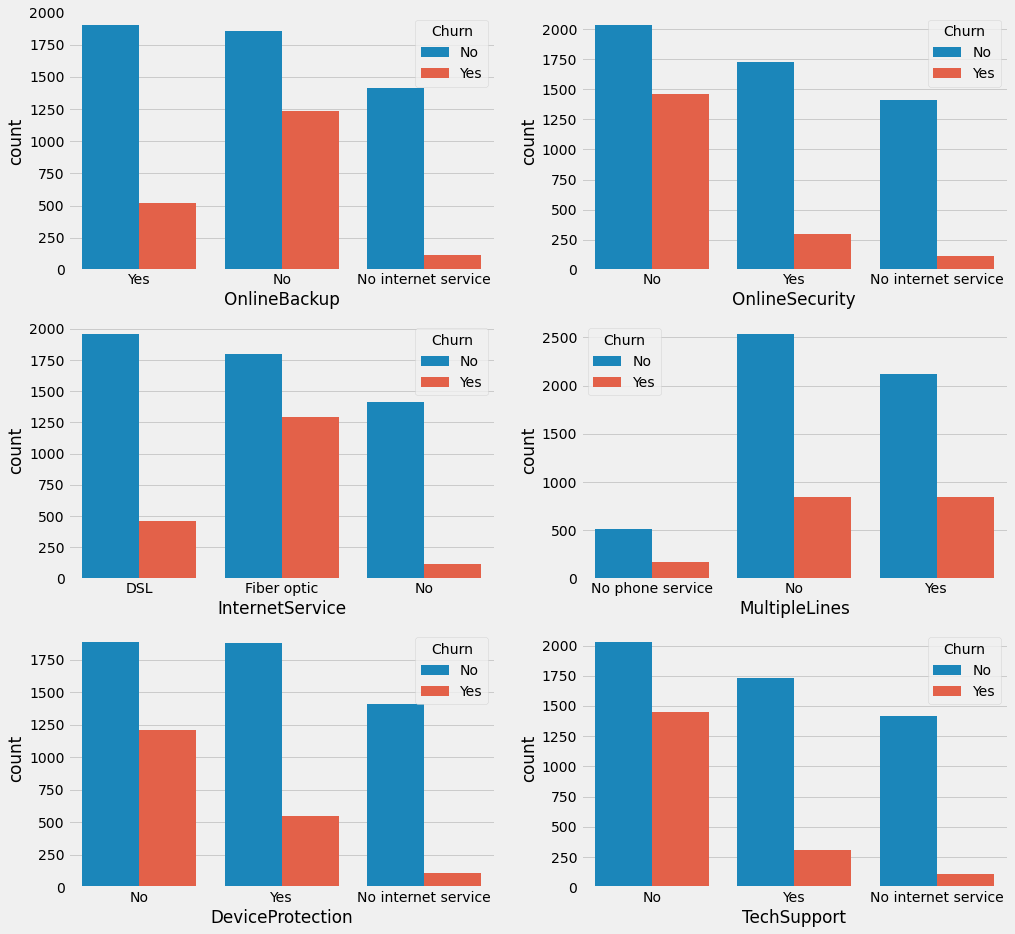

In [14]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot(x='OnlineBackup', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot(x='OnlineSecurity', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot(x='InternetService', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot(x='MultipleLines', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot(x='DeviceProtection', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot(x='TechSupport', data=data, hue='Churn')

## `StreamingMovies`, `StreamingTV`, `PaymentMethod`, `Contract`
- `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `PaymentMethod`: The customer's payment method (Electronic check, Mailed check, Bank Transfer (automatic), Credit card (automatic))
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)

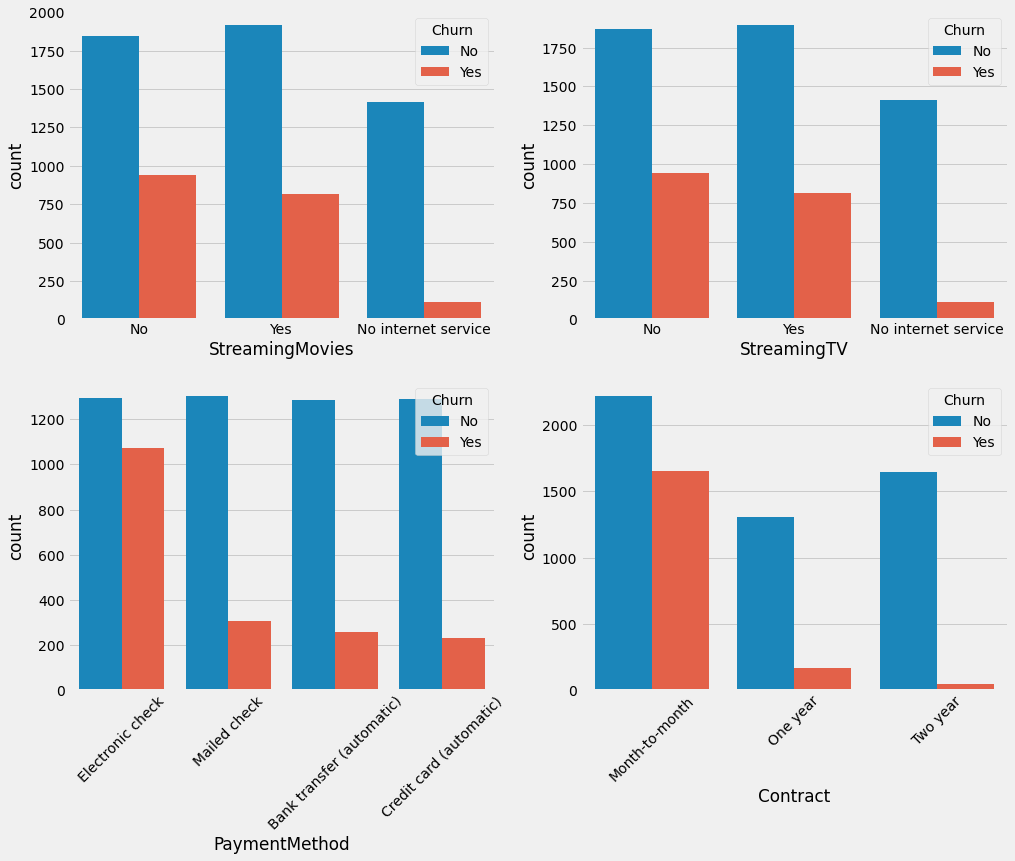

In [15]:
plt.figure(figsize=(15, 18))

plt.subplot(3, 2, 1)
sns.countplot(x='StreamingMovies', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot(x='StreamingTV', data=data, hue='Churn')

plt.subplot(3, 2, 3)
g = sns.countplot(x='PaymentMethod', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

plt.subplot(3, 2, 4)
g = sns.countplot(x='Contract', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

# 2. Feature Engineering

## Missing Values

In [16]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
data['TotalCharges'] = data.TotalCharges.fillna(value=data.TotalCharges.median())

In [18]:
data.TotalCharges.median()

1397.475

## `OnlineSecurity`, `OnlineBackup`, `InternetService`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`

In [19]:
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns:
    data[column] = data[column].replace({'No internet service':'No'})

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes


## Binary Columns

In [21]:
binary_columns = [column for column in data.columns if data[column].nunique() == 2]
len(binary_columns)

13

In [22]:
columns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',  
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'Churn']
for col in columns:
    data[col] = data[col].map({'Yes':1, 'No':0})
    
data['gender'] = data.gender.map({'Male':1, 'Female':0})

In [23]:
for col in binary_columns:
    print(data[col].unique())

[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


## `customerID`
we are going to drop the customers ID

In [24]:
customerID = data.customerID
data.drop('customerID', axis=1, inplace=True)

## `tenure`

In [25]:
def tenure_lab(period) :
    
    if period <= 12 :
        return 1
    elif (period > 12) & (period <= 24 ):
        return 2
    elif (period > 24) & (period <= 36) :
        return 3
    elif (period > 36) & (period <= 48) :
        return 3
    elif (period > 48) & (period <= 60) :
        return 4
    elif period > 60 :
        return 5
    
data['tenure'] = data.tenure.apply(tenure_lab)

In [26]:
data.tenure.value_counts()

1    2186
3    1594
5    1407
2    1024
4     832
Name: tenure, dtype: int64

## `MultipleLines`, `InternetService`, `Contract`, `PaymentMethod`
We are going to transfer these columns into dummy variables

In [27]:
dummy_col = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure']
data_1 = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')

In [28]:
data_1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_2,tenure_3,tenure_4,tenure_5
0,0,0,1,0,0,0,1,0,0,0,0,1,29.8500,29.8500,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,1,0,1,0,0,0,0,56.9500,1889.5000,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,1,53.8500,108.1500,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,1,1,0,0,0,42.3000,1840.7500,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,70.7000,151.6500,1,0,0,1,0,0,0,0,1,0,0,0,0,0


## Correlation Analysis

<AxesSubplot:>

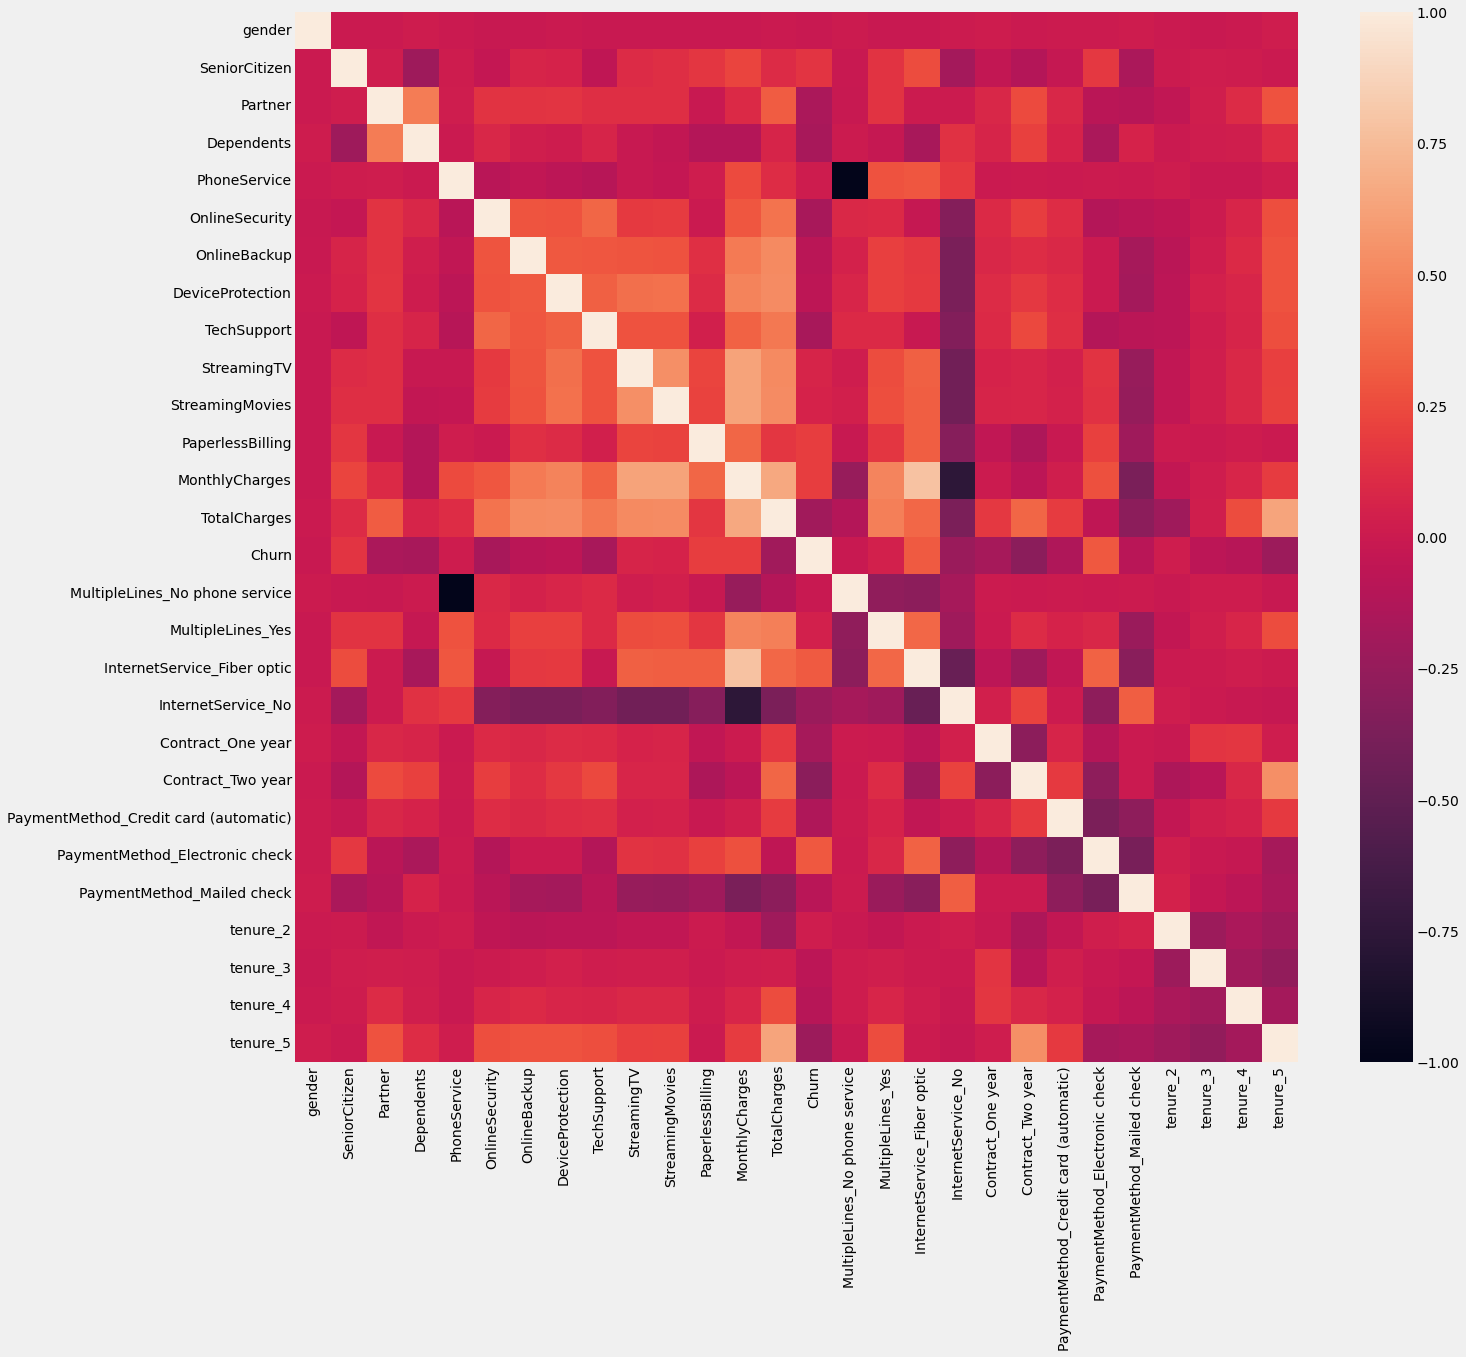

In [29]:
plt.figure(figsize=(20, 18))
sns.heatmap(data_1.corr(), annot=False)

<AxesSubplot:>

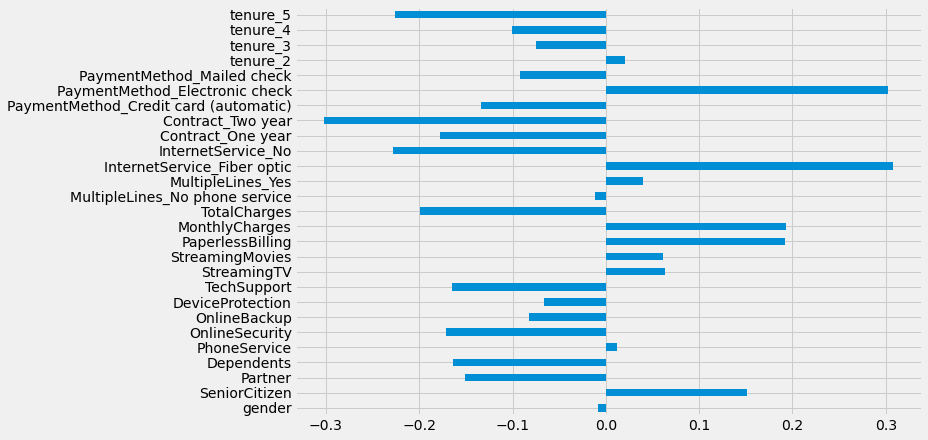

In [30]:
data_1.drop('Churn', axis=1).corrwith(data.Churn).plot(kind='barh', figsize=(10, 7))

## Checking for duplicate rows and columns

In [31]:
print(data_1.shape)

# Remove duplicate Features
data_1 = data_1.T.drop_duplicates()
data_1 = data_1.T

# Remove Duplicate Rows
data_1.drop_duplicates(inplace=True)

print(data_1.shape)

(7043, 28)
(7021, 28)


# 3. Data Preprocessing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = data_1.drop('Churn', axis=1)
y = data_1.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

# 4. Model Building
## Base line model

We an imbalanced problem here. If we predict that all our customers will not churn, we will have an accuracy of `73.84%`.

In [33]:
(y_test.value_counts()[0] / y_test.shape)[0]

0.7384907451352634

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## 1. Logistic Regression

In [35]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3289  319]
 [ 635  671]]
ACCURACY SCORE:
0.8059
CLASSIFICATION REPORT:
                0.0       1.0  accuracy  macro avg  weighted avg
precision    0.8382    0.6778    0.8059     0.7580        0.7955
recall       0.9116    0.5138    0.8059     0.7127        0.8059
f1-score     0.8733    0.5845    0.8059     0.7289        0.7966
support   3608.0000 1306.0000    0.8059  4914.0000     4914.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1404  152]
 [ 277  274]]
ACCURACY SCORE:
0.7964
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision    0.8352   0.6432    0.7964     0.7392        0.7850
recall       0.9023   0.4973    0.7964     0.6998        0.7964
f1-score     0.8675   0.5609    0.7964     0.7142        0.7873
support   1556.0000 551.0000    0.7964  2107.0000     2107.0000


### Cross Validation Score for Logistic Regression

In [36]:
scores = cross_val_score(lr_clf, X_std, y, cv=3, scoring='f1')
print(scores)
print(f"Logistic Regression f1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.56986301 0.57220708 0.57904412]
Logistic Regression f1_score: 57.37% +/- (0.39)


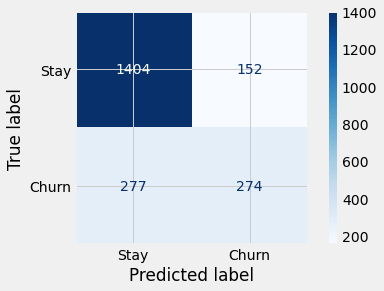

In [38]:
disp = ConfusionMatrixDisplay.from_estimator(
    lr_clf, X_test_std, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Stay', 'Churn']
)

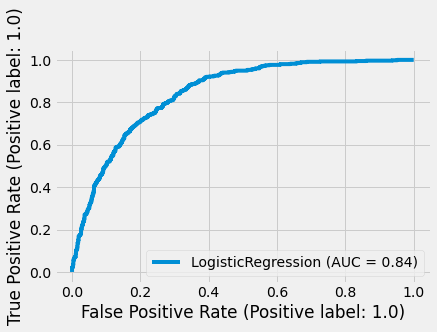

In [39]:
disp = RocCurveDisplay.from_estimator(
    lr_clf, X_test_std, y_test
)

## 2. Random Forest Classifier

In [40]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
churn = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Churning Rate: {churn * 100 :.2f}%")

Staying Rate: 73.42%
Churning Rate: 26.58%


In [41]:
rand_forest = RandomForestClassifier(n_estimators=1000)
rand_forest.fit(X_train, y_train)

evaluate(rand_forest, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3600    8]
 [   6 1300]]
ACCURACY SCORE:
0.9972
CLASSIFICATION REPORT:
                0.0       1.0  accuracy  macro avg  weighted avg
precision    0.9983    0.9939    0.9972     0.9961        0.9972
recall       0.9978    0.9954    0.9972     0.9966        0.9972
f1-score     0.9981    0.9946    0.9972     0.9964        0.9972
support   3608.0000 1306.0000    0.9972  4914.0000     4914.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1390  166]
 [ 282  269]]
ACCURACY SCORE:
0.7874
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision    0.8313   0.6184    0.7874     0.7249        0.7757
recall       0.8933   0.4882    0.7874     0.6908        0.7874
f1-score     0.8612   0.5456    0.7874     0.7034        0.7787
support   1556.0000 551.0000    0.7874  2107.0000     2107.0000


In [42]:
rf_clf = RandomForestClassifier(n_estimators=100)

param_grid = {
    'n_estimators':[550, 600, 650],
    'max_depth':[3, 5, 7, 10, 15, None], 
    'min_samples_split':[2, 3, 10], 
    'min_samples_leaf':[1, 3, 5, 7, 10], 
    'criterion':["gini", "entropy"]
}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
rf_grid_cv.fit(X_train, y_train)

best_params = rf_grid_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 650}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3427  181]
 [ 491  815]]
ACCURACY SCORE:
0.8632
CLASSIFICATION REPORT:
                0.0       1.0  accuracy  macro avg  weighted avg
precision    0.8747    0.8183    0.8632     0.8465        0.8597
recall       0.9498    0.6240    0.8632     0.7869        0.8632
f1-score     0.9107    0.7081    0.8632     0.8094        0.8569
support   3608.0000 1306.0000    0.8632  4914.0000     4914.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1413  143]
 [ 280  271]]
ACCURACY SCORE:
0.7992
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision    0.8346   0.6546    0.7992     0.7446        0.7875
recall       0.9081   0.4918    0.7992     0.7000        0.7992
f1-score     0.8698   0.5617    0.7992     0.7157        0.7892
support 

### Cross Validation Score for Random Forest Classifier

In [43]:
scores = cross_val_score(rf_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.56682464 0.56117755 0.5610438 ]
Random Forest F1_score: 56.30% +/- (0.27)


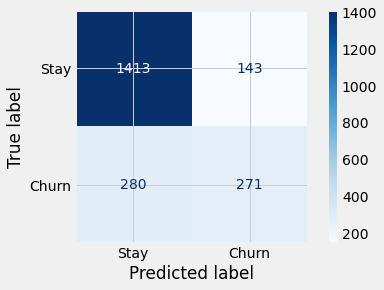

In [44]:
disp = ConfusionMatrixDisplay.from_estimator(
    rf_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Stay', 'Churn']
)

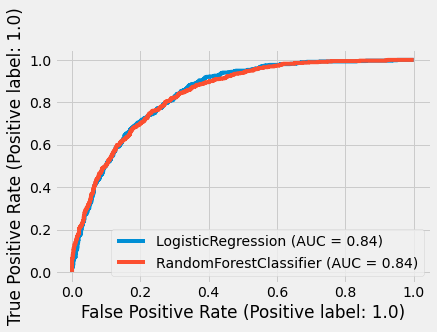

In [45]:
disp = RocCurveDisplay.from_estimator(lr_clf, X_test_std, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

## 3. Support Vector Machine

In [46]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3364  244]
 [ 623  683]]
ACCURACY SCORE:
0.8236
CLASSIFICATION REPORT:
                0.0       1.0  accuracy  macro avg  weighted avg
precision    0.8437    0.7368    0.8236     0.7903        0.8153
recall       0.9324    0.5230    0.8236     0.7277        0.8236
f1-score     0.8858    0.6117    0.8236     0.7488        0.8130
support   3608.0000 1306.0000    0.8236  4914.0000     4914.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1427  129]
 [ 300  251]]
ACCURACY SCORE:
0.7964
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision    0.8263   0.6605    0.7964     0.7434        0.7829
recall       0.9171   0.4555    0.7964     0.6863        0.7964
f1-score     0.8693   0.5392    0.7964     0.7043        0.7830
support   1556.0000 551.0000    0.7964  2107.0000     2107.0000


In [52]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['rbf']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
grid_cv.fit(X_train_std, y_train)

best_params = grid_cv.best_params_
print(f"Best parameters: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train_std, y_train)
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3352  256]
 [ 707  599]]
ACCURACY SCORE:
0.8040
CLASSIFICATION REPORT:
                0.0       1.0  accuracy  macro avg  weighted avg
precision    0.8258    0.7006    0.8040     0.7632        0.7925
recall       0.9290    0.4587    0.8040     0.6938        0.8040
f1-score     0.8744    0.5544    0.8040     0.7144        0.7893
support   3608.0000 1306.0000    0.8040  4914.0000     4914.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1436  120]
 [ 303  248]]
ACCURACY SCORE:
0.7992
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision    0.8258   0.6739    0.7992     0.7498        0.7861
recall       0.9229   0.4501    0.7992     0.6865        0.7992
f1-score     0.8716   0.5397    0.7992     0.7057        0.7848
support   1556.0000 551.0000    0.7992  2107.0000     2107.0000


### Cross Validation Score for Support Vector Machine

In [53]:
scores = cross_val_score(svm_clf, X_std, y, cv=3, scoring='f1')
print(scores)
print(f"Support Vector Machine f1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.57088123 0.53947368 0.53802281]
Support Vector Machine f1_score: 54.95% +/- (1.52)


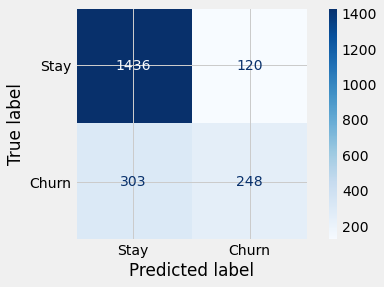

In [54]:
disp = ConfusionMatrixDisplay.from_estimator(
    svm_clf, X_test_std, y_test, 
    cmap='Blues', values_format='d',
    display_labels=['Stay', 'Churn']
)

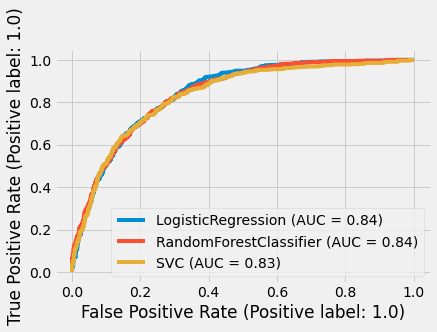

In [55]:
disp = RocCurveDisplay.from_estimator(lr_clf, X_test_std, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svm_clf, X_test_std, y_test, ax=disp.ax_)

## 4. XGBoost Classifier

In [56]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3510   98]
 [ 185 1121]]
ACCURACY SCORE:
0.9424
CLASSIFICATION REPORT:
                0.0       1.0  accuracy  macro avg  weighted avg
precision    0.9499    0.9196    0.9424     0.9348        0.9419
recall       0.9728    0.8583    0.9424     0.9156        0.9424
f1-score     0.9612    0.8879    0.9424     0.9246        0.9418
support   3608.0000 1306.0000    0.9424  4914.0000     4914.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1361  195]
 [ 280  271]]
ACCURACY SCORE:
0.7746
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision    0.8294   0.5815    0.7746     0.7055        0.7646
recall       0.8747   0.4918    0.7746     0.6833        0.7746
f1-score     0.8514   0.5329    0.7746     0.6922        0.7681
support   1556.0000 551.0000    0.7746  2107.0000     2107.0000


In [57]:
hyperparameter_grid = {
    'n_estimators': [75, 90, 100, 125], 
    'learning_rate' : [0.09, 0.1, 0.2], 
    'base_score' : [0.15],
    'colsample_bytree':[0.85, 0.95, 1],
    'colsample_bylevel':[0.85, 0.95, 1],
    'colsample_bynode':[0.85, 0.95, 1]
}

xgb_clf = XGBClassifier()
xgb_cv = GridSearchCV(
    estimator=xgb_clf, 
    param_grid=hyperparameter_grid, 
    cv=3, 
    scoring='f1', 
    n_jobs =-1, 
    verbose=1
)

xgb_cv.fit(X_train, y_train)

best_params = xgb_cv.best_params_
print(f"Best parameters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'base_score': 0.15, 'colsample_bylevel': 0.85, 'colsample_bynode': 1, 'colsample_bytree': 0.95, 'learning_rate': 0.09, 'n_estimators': 125}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3405  203]
 [ 381  925]]
ACCURACY SCORE:
0.8812
CLASSIFICATION REPORT:
                0.0       1.0  accuracy  macro avg  weighted avg
precision    0.8994    0.8200    0.8812     0.8597        0.8783
recall       0.9437    0.7083    0.8812     0.8260        0.8812
f1-score     0.9210    0.7601    0.8812     0.8405        0.8782
support   3608.0000 1306.0000    0.8812  4914.0000     4914.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1379  177]
 [ 268  283]]
ACCURACY SCORE:
0.7888
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision    0.8373   0.6152    0.7888     0.7262        0.7792
recall       0.8862   0.5136    0.7888     0.6999        0.7888
f1-score     0.8611   0.5598    0.7888     0

### Cross Validation Score For XGBoost

In [58]:
scores = cross_val_score(xgb_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.57894737 0.56943231 0.56832579]
XGBoost F1_score: 57.22% +/- (0.48)


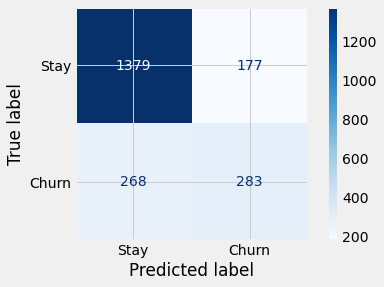

In [59]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Stay', 'Churn']
)

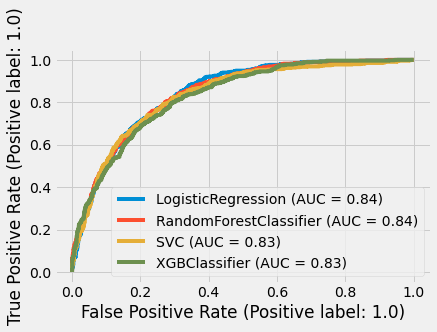

In [60]:
disp = RocCurveDisplay.from_estimator(lr_clf, X_test_std, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svm_clf, X_test_std, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test, ax=disp.ax_)

## Feature Importance

In [61]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

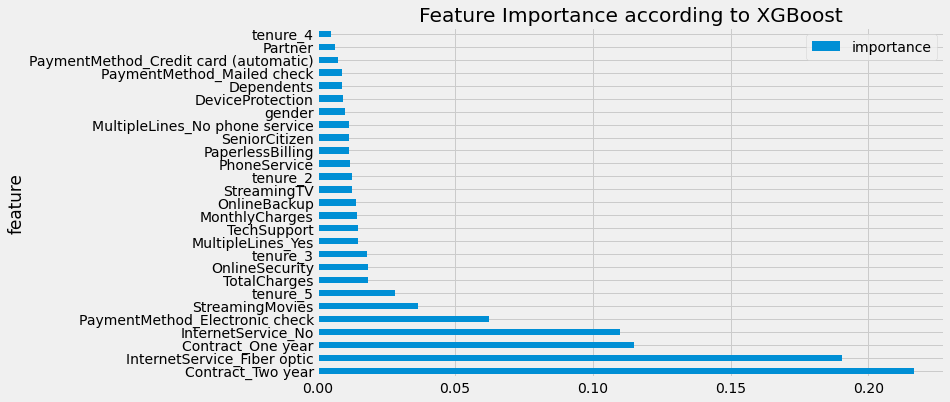

In [62]:
df = feature_imp(data_1.drop('Churn', axis=1), xgb_clf)
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance according to XGBoost')

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

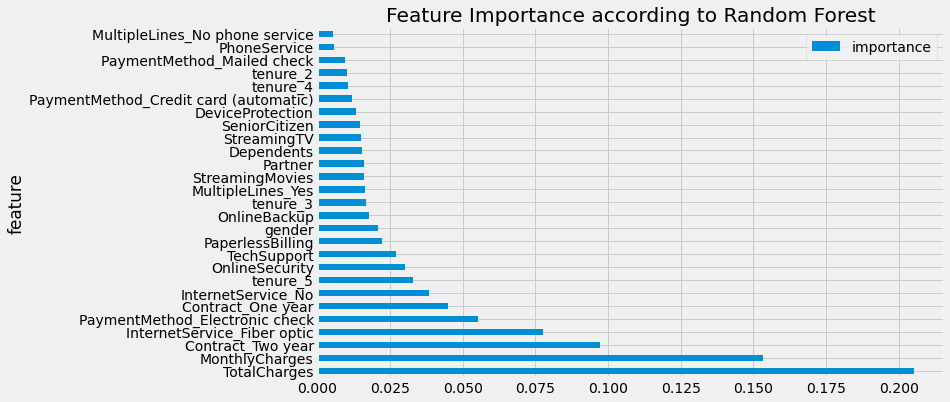

In [63]:
df = feature_imp(data_1.drop('Churn', axis=1), rf_clf)
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance according to Random Forest')

In [65]:
rfe = RFE(lr_clf, n_features_to_select=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
    n_features_to_select=1)

In [66]:
rfe_ranking = dict(zip(rfe.ranking_.tolist(), X_train.columns.tolist()))
print(rfe_ranking)

{23: 'gender', 14: 'SeniorCitizen', 24: 'Partner', 19: 'Dependents', 10: 'PhoneService', 9: 'OnlineSecurity', 18: 'OnlineBackup', 22: 'DeviceProtection', 13: 'TechSupport', 15: 'StreamingTV', 12: 'StreamingMovies', 17: 'PaperlessBilling', 25: 'MonthlyCharges', 26: 'TotalCharges', 27: 'MultipleLines_No phone service', 16: 'MultipleLines_Yes', 3: 'InternetService_Fiber optic', 4: 'InternetService_No', 2: 'Contract_One year', 1: 'Contract_Two year', 20: 'PaymentMethod_Credit card (automatic)', 11: 'PaymentMethod_Electronic check', 21: 'PaymentMethod_Mailed check', 8: 'tenure_2', 7: 'tenure_3', 6: 'tenure_4', 5: 'tenure_5'}
